In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1.648000e+03
mean,1258.847513,1270.933454,1247.417916,1259.701064,1259.701064,1.658962e+06
std,596.961222,602.468402,591.955360,597.508465,597.508465,8.179456e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.468000e+05
25%,807.060013,810.619980,802.572510,806.889984,806.889984,1.173850e+06
50%,1105.674988,1119.025024,1094.605041,1105.125000,1105.125000,1.454150e+06
75%,1430.257477,1441.098755,1412.432495,1430.950012,1430.950012,1.889625e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,1.116490e+07


In [5]:
data = data[["Date", "Close"]]

,Date,Close
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [9]:
data = data.rename(columns={"Date": "ds", "Close": "y"})

In [10]:
data.head(5)

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [6]:
from fbprophet import Prophet

In [7]:
m = Prophet(daily_seasonality = True)

In [11]:
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [12]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2015-06-08
1,2015-06-09
2,2015-06-10
3,2015-06-11
4,2015-06-12
...,...
2008,2022-12-16
2009,2022-12-17
2010,2022-12-18
2011,2022-12-19


In [13]:
prediction = m.predict(future)

In [15]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-08,514.353623,435.690326,578.704052,514.353623,514.353623,-6.598400,-6.598400,-6.598400,-32.765879,-32.765879,-32.765879,-4.128599,-4.128599,-4.128599,30.296078,30.296078,30.296078,0.0,0.0,0.0,507.755223
1,2015-06-09,516.004212,435.978117,584.642876,516.004212,516.004212,-4.460254,-4.460254,-4.460254,-32.765879,-32.765879,-32.765879,-2.505550,-2.505550,-2.505550,30.811175,30.811175,30.811175,0.0,0.0,0.0,511.543958
2,2015-06-10,517.654802,442.705657,587.749064,517.654802,517.654802,-2.461028,-2.461028,-2.461028,-32.765879,-32.765879,-32.765879,-0.770517,-0.770517,-0.770517,31.075368,31.075368,31.075368,0.0,0.0,0.0,515.193773
3,2015-06-11,519.305391,451.285750,587.256702,519.305391,519.305391,-1.973130,-1.973130,-1.973130,-32.765879,-32.765879,-32.765879,-0.286605,-0.286605,-0.286605,31.079355,31.079355,31.079355,0.0,0.0,0.0,517.332261
4,2015-06-12,520.955981,452.185910,589.100441,520.955981,520.955981,-2.446779,-2.446779,-2.446779,-32.765879,-32.765879,-32.765879,-0.500198,-0.500198,-0.500198,30.819299,30.819299,30.819299,0.0,0.0,0.0,518.509202


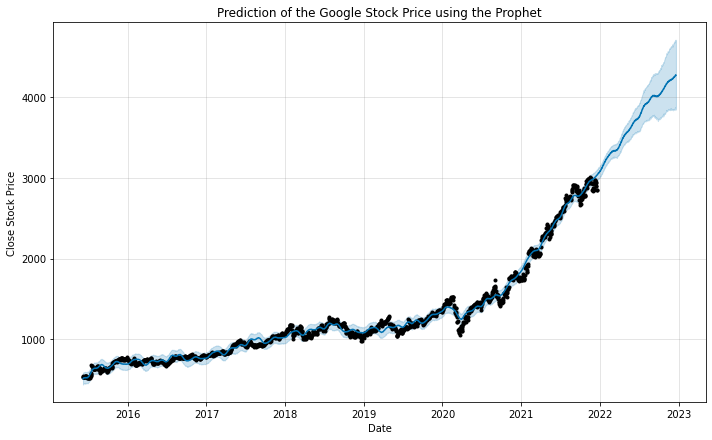

In [16]:
m.plot(prediction)

plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

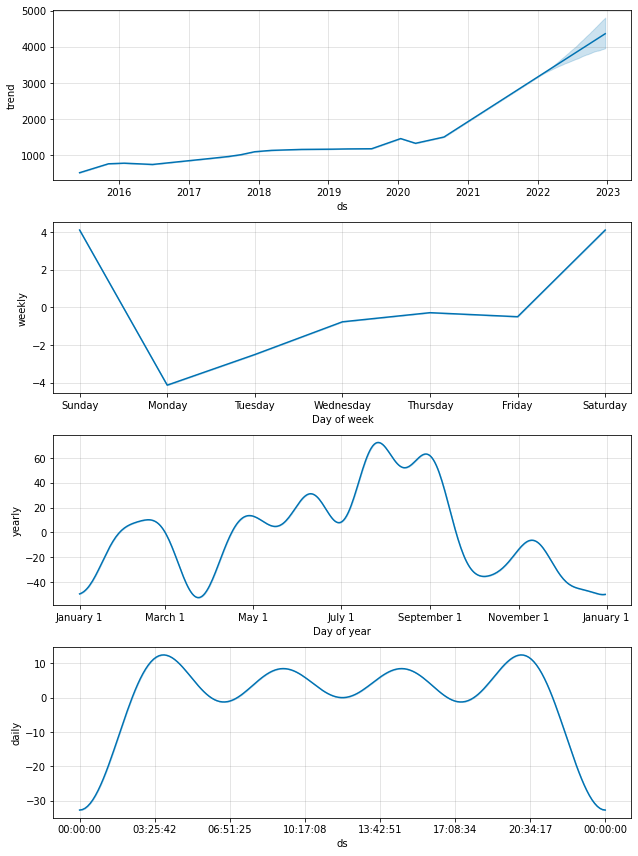

In [17]:
m.plot_components(prediction)
plt.show()